1. Run an OLS regression using a different set of data. Use the regression class created in this chapter. Print the results.


In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('unemployment_data_us.csv')
data

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2016,Dec,7.5,Dec-2016,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,4.3
128,2017,Dec,6.2,Dec-2017,4.2,3.6,2.2,3.7,6.7,2.5,5.0,3.7,3.7
129,2018,Dec,5.8,Dec-2018,3.8,3.3,2.2,3.4,6.6,3.3,4.4,3.6,3.5
130,2019,Dec,5.2,Dec-2019,3.7,2.7,1.9,3.2,5.9,2.5,4.2,3.1,3.2


In [2]:

correlation = data.iloc[:100]

correlation = pd.DataFrame(correlation)
# Select columns 3 and onwards and reset the column index
correlation = correlation.iloc[:, 4:].reset_index(drop=True)
# Move column 2 to the beginning of the dataframe
cols = list(correlation.columns)

correlation = correlation[cols]
correlation = correlation.dropna()

correlation



,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...
94,5.3,4.2,2.5,4.4,8.5,3.8,6.4,4.7,4.4
95,4.4,3.6,2.3,3.7,7.2,3.6,5.1,3.9,3.9
96,3.8,3.2,2.0,3.3,6.2,3.5,4.6,3.4,3.3
97,3.6,2.9,2.0,3.2,5.5,2.5,3.9,3.2,3.1


In [3]:
headers = list(correlation.keys())

headers

['High_School',
 'Associates_Degree',
 'Professional_Degree',
 'White',
 'Black',
 'Asian',
 'Hispanic',
 'Men',
 'Women']

In [4]:
y_var = [headers[-1]]
x_vars = [headers[:-1]]
correl_data = correlation[headers]
# correlation.corr().round(2)
correl_data.corr().round(2)




,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
High_School,1.00,0.98,0.98,0.99,0.98,0.96,0.99,0.99,0.98
Associates_Degree,0.98,1.00,0.98,0.99,0.98,0.96,0.99,0.99,0.99
Professional_Degree,0.98,0.98,1.00,0.99,0.98,0.96,0.99,0.99,0.99
White,0.99,0.99,0.99,1.00,0.98,0.96,1.00,1.00,0.99
Black,0.98,0.98,0.98,0.98,1.00,0.95,0.98,0.98,0.99
Asian,0.96,0.96,0.96,0.96,0.95,1.00,0.95,0.96,0.95
Hispanic,0.99,0.99,0.99,1.00,0.98,0.95,1.00,0.99,0.99
Men,0.99,0.99,0.99,1.00,0.98,0.96,0.99,1.00,0.98
Women,0.98,0.99,0.99,0.99,0.99,0.95,0.99,0.98,1.00


In [5]:
#regression.py
import pandas as pd
import numpy as np
import copy
from stats import *
from scipy.stats import t, f

class Regression:
    def __init__(self):
        self.reg_history = {}
    def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,
            max_val = None, constant = True):
        # min_val and max_val set index range by index number
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        # enodogenous variable name
        self.y_name = y_name
        # names of X variables
        self.beta_names = copy.copy(beta_names)
        #make a copy of the data that is passed to OLS
        self.data = data.copy()
        # if the OLS regression has a constant, add column of 1s to data
        if constant:
            self.add_constant()
        self.build_matrices() 
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        self.save_output()
    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")
    
    def build_matrices(self):
        # Transform dataframes to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a k X n nested list containing vectors for each exogenous var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inv = X_transp_X.getI()
        # X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)
        
    def estimate_betas_and_yhat(self):
        # betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)
        # y_hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        # Create a column that hold y-hat values
        #.item(n) pulls nth value from matrix
        self.data[self.y_name[0] + " estimator"] = \
            [i.item(0) for i in self.y_hat]
        # create a table that holds the estimated coefficient
        # this will also be used to store SEs, t-stats, and p-values
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        # identify y variable in index
        self.estimates.index.name = "y = " + self.y_name[0]        
        
    def calculate_regression_stats(self):
        self.sum_square_stats()
        self.calculate_degrees_of_freedom()
        self.calculate_estimator_variance()
        self.calculate_covariance_matrix()
        self.calculate_t_p_error_stats()
        self.calculate_MSE()
        self.calculate_rsquared()
        self.calculate_fstat()
        self.build_stats_DF()
        
    def sum_square_stats(self):
        ssr_list = []
        sse_list = []
        sst_list = []
        mean_y = self.stats.mean(self.y).item(0)
        for i in range(len(self.y)):
            # ssr is sum of squared distances between the estimated y values
            # (y-hat) and the average of y values (y-bar)
            yhat_i = self.y_hat[i]
            y_i = self.y[i]
            r = yhat_i - mean_y
            e = y_i - yhat_i
            t = y_i - mean_y
            ssr_list.append((r) ** 2)
            sse_list.append((e) ** 2)
            sst_list.append((t) ** 2)
            
        # call item - call value instead of matrix
        self.ssr = self.stats.total(ssr_list).item(0)
        self.sse = self.stats.total(sse_list).item(0)
        self.sst = self.stats.total(sst_list).item(0)
        
    def calculate_degrees_of_freedom(self):
        # Degrees of freedom compares the number of observations to the number
        # of exogenous variables used to form the prediction
        self.lost_degrees_of_freedom = len(self.estimates)
        self.num_obs = self.max_val + 1 - self.min_val
        self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom
        
    def calculate_estimator_variance(self):
#        estimator variance is the sse normalized by the degrees of freedom
        # thus, estimator variance increases as the number of exogenous
        # variables used in estimation increases(i.e., as degrees of freedom 
        # fall)
        self.estimator_variance = self.sse / self.degrees_of_freedom
        
    def calculate_covariance_matrix(self):
        # Covariance matrix will be used to estimate standard errors for
        # each coefficient.
        # estimator variance * (X'X)**-1
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv
        self.cov_matrix = pd.DataFrame(self.cov_matrix,
                                       columns = self.beta_names,
                                       index = self.beta_names)

    def calculate_t_p_error_stats(self):
        ratings = [.05, .01, .001]
        results = self.estimates
        stat_sig_names = ["SE", "t-stat", "p-value"]
        # create space in data frame for SE, t, and p
        for stat_name in stat_sig_names:
            results[stat_name] = np.nan
        # generate statistic for each variable
        for var in self.beta_names:
            # SE ** 2 of coefficient is found in the diagonal of cov_matrix
            results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)
            
            # t-stat = Coef / SE
            results.loc[var]["t-stat"] = \
                results["Coefficient"][var] / results["SE"][var]
            # p-values is estimated using a table that transforms t-value in 
            # light of degrees of freedom
            results.loc[var]["p-value"] = np.round(t.sf(np.abs(results.\
                       loc[var]["t-stat"]), self.degrees_of_freedom + 1) * 2, 5)
        # values for significances will be blank unless p-values < .05
        # pandas does not allow np.nan values or default blank strings to 
        # be replaced x-post
        significance = ["" for i in range(len(self.beta_names))]
        for i in range(len(self.beta_names)):
            var = self.beta_names[i]
            for val in ratings:
                if results.loc[var]["p-value"] < val:
                    significance[i] = significance[i]  + "*"
        results["signficance"] = significance
        
    def calculate_MSE(self):
        self.mse = self.estimator_variance ** (1/2)
    
    def calculate_rsquared(self):
        self.r_sq = self.ssr / self.sst
        self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst \
                            / (self.num_obs - 1))
        
    def calculate_fstat(self):
        self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                      - 1) / self.estimator_variance
        
    def build_stats_DF(self):
        stats_dict = {"r**2": [self.r_sq],
                      "Adj. r**2": [self.adj_r_sq],
                      "f-stat":[self.f_stat],
                      "Est Var":[self.estimator_variance],
                      "MSE":[self.mse],
                      "SSE":[self.sse],
                      "SSR":[self.ssr],
                      "SST":[self.sst],
                      "Obs.":[int(self.num_obs)],
                      "DOF":[int(self.degrees_of_freedom)]}
        self.stats_DF = pd.DataFrame(stats_dict)
        self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
        self.stats_DF = self.stats_DF.T
        
    def save_output(self):
        self.reg_history[self.reg_name] = {"Reg Stats": self.stats_DF.copy(),
                        "Estimates": self.estimates.copy(),
                        "Cov Matrix":self.cov_matrix.copy()}
    

    
    def joint_f_test(self, reg1_name, reg2_name):  
        # identify data for each regression  
        reg1 = self.reg_history[reg1_name]         
        reg2 = self.reg_history[reg2_name]  
        # identify beta estimates for each regression to draw variables  
        reg1_estimates = reg1["Estimates"]          
        reg2_estimates = reg2["Estimates"]  
        # name of y_var is saved as estimates index name  
        reg1_y_name = reg1_estimates.index.name  
        reg2_y_name = reg2_estimates.index.name  
        num_obs1 = reg1["Reg Stats"].loc["Obs."][0]  
        num_obs2 = reg2["Reg Stats"].loc["Obs."][0]  
        # check that the f-stat is measuring restriction, not for diff data sets
        if num_obs1 != num_obs2:   
            self.joint_f_error()  
        if reg1_y_name == reg2_y_name:          
            restr_reg = reg1 if \
            len(reg1_estimates.index) < len(reg2_estimates.index) else reg2 
            unrestr_reg = reg2 if restr_reg is reg1 else reg1  
            restr_var_names = restr_reg["Estimates"].index  
            unrestr_var_names = unrestr_reg["Estimates"].index  
            # identify statistics for each regression  
            restr_reg = restr_reg if False not in \
            [key in unrestr_var_names for key in restr_var_names] else None
            if restr_reg == None:  
                self.joint_f_error()  
            else:  
                sser = restr_reg["Reg Stats"].loc["SSE"][0]  
                sseu = unrestr_reg["Reg Stats"].loc["SSE"][0]  
                dofr = restr_reg["Reg Stats"].loc["DOF"][0]       
                dofu = unrestr_reg["Reg Stats"].loc["DOF"][0]  
                dfn = dofr - dofu  
                dfd = dofu - 1  
                f_stat = ((sser - sseu) / (dfn)) / (sseu / (dfd))  
                f_crit_val = 1 - f.cdf(f_stat,dfn = dfn, dfd = dfd)  
                #make dictionary?  
                f_test_label = ""  
                for key in unrestr_var_names:  
                    if key not in restr_var_names:  
                        f_test_label = f_test_label + str(key) + " = "  
                f_test_label = f_test_label + "0"  
                res_dict = {"f-stat":[f_stat],  
                            "p-value":[f_crit_val],  
                            "dfn":[dfn],  
                            "dfd":[dfd]}  
                res_DF = pd.DataFrame(res_dict)  
                res_DF = res_DF.rename(index={0:""})  
                res_DF = res_DF.T  
                res_DF.index.name = f_test_label  
                
                return res_DF  
          
    def joint_f_error(self):  
        print("Regressions not comparable for joint F-test")  
        return None  


In [6]:
import statsmodels.api as sm
y = correl_data[y_var]
print(x_vars)

x = correl_data[['High_School', 'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian', 'Hispanic', 'Men']]

# x["Constant"] = 1
sm.add_constant(1)
results = sm.OLS(y, x).fit()
results.summary()

[['High_School', 'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian', 'Hispanic', 'Men']]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Women   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.439e+04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                   7.94e-156
Time:                        16:19:14   Log-Likelihood:                          102.01
No. Observations:                  94   AIC:                                     -188.0
Df Residuals:                      86   BIC:                                     -167.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
High_School             0.1857      0.038      4.828      0.000       0.109       0.262
Associates_Degree       0.2000      0.047      4.267      0.000       0.107       0.293
Professional_Degree     0.0946      0.068      1.387      0.169      -0.041       0.230
White                   1.0374      0.111      9.345      0.000       0.817       1.258
Black                   0.2095      0.016     12.744      0.000       0.177       0.242
Asian                   0.1017      0.022      4.691      0.000       0.059       0.145
Hispanic                0.0271      0.033      0.811      0.420      -0.039       0.093
Men                    -0.9658      0.051    -18.862      0.000      -1.068      -0.864
==============================================================================
Omnibus:                        5.113   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                2.677
Skew:                          -0.148   Prob(JB):                        0.262
Kurtosis:                       2.228   Cond. No.                         296.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Create scatter plots of the observation and predicted values as demonstrated at the end of this chapter.


In [7]:
predicted = results.predict()


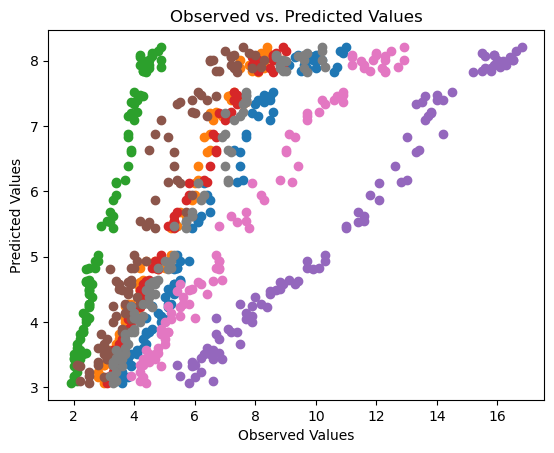

In [8]:
import matplotlib.pyplot as plt

# Create scatter plot

plt.scatter(x['High_School'], predicted)
plt.scatter(x['Associates_Degree'], predicted)
plt.scatter(x['Professional_Degree'], predicted)
plt.scatter(x['White'], predicted)
plt.scatter(x['Black'], predicted)
plt.scatter(x['Asian'], predicted)
plt.scatter(x['Hispanic'], predicted)
plt.scatter(x['Men'], predicted)


# Add title and axis labels
plt.title("Observed vs. Predicted Values")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")

# Show the plot
plt.show()

3. Use the numpy libraries log function to log some or all value in your data. Print the columns of data that have been logged. (hint: pass the appropriate list of keys to the dataframe, data[[key1,key2,key3…]])


In [9]:
log_data = np.log(correl_data)
log_data


,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2.322388,2.151762,1.589235,2.174752,2.803360,2.116256,2.557227,2.322388,2.066863
1,2.251292,2.091864,1.458615,2.091864,2.760010,1.916923,2.509599,2.197225,2.066863
2,2.140066,1.960095,1.458615,2.001480,2.610070,1.902108,2.370244,2.041220,2.028148
3,2.091864,1.931521,1.335001,1.960095,2.617396,1.856298,2.272126,2.014903,1.974081
4,1.871802,1.774952,1.193922,1.740466,2.493205,1.547563,2.116256,1.824549,1.757858
...,...,...,...,...,...,...,...,...,...
94,1.667707,1.435085,0.916291,1.481605,2.140066,1.335001,1.856298,1.547563,1.481605
95,1.481605,1.280934,0.832909,1.308333,1.974081,1.280934,1.629241,1.360977,1.360977
96,1.335001,1.163151,0.693147,1.193922,1.824549,1.252763,1.526056,1.223775,1.193922
97,1.280934,1.064711,0.693147,1.163151,1.704748,0.916291,1.360977,1.163151,1.131402


4. Run the same regression again. Print the results. How has the significance changed?


In [10]:
import statsmodels.api as sm
y = correl_data[y_var]
print(x_vars)

x = log_data[['High_School', 'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian', 'Hispanic', 'Men']]

# x["Constant"] = 1
sm.add_constant(1)
results = sm.OLS(y, x).fit()
results.summary()

[['High_School', 'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian', 'Hispanic', 'Men']]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Women   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              7687.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                   2.61e-119
Time:                        16:19:15   Log-Likelihood:                          10.099
No. Observations:                  94   AIC:                                     -4.198
Df Residuals:                      86   BIC:                                      16.15
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
High_School             1.2712      0.599      2.122      0.037       0.080       2.462
Associates_Degree       3.3524      0.577      5.808      0.000       2.205       4.500
Professional_Degree     3.2755      0.557      5.883      0.000       2.169       4.382
White                   0.7704      1.355      0.569      0.571      -1.923       3.464
Black                  -2.3651      0.268     -8.831      0.000      -2.897      -1.833
Asian                  -0.2123      0.251     -0.847      0.400      -0.711       0.286
Hispanic               -0.2174      0.640     -0.340      0.735      -1.490       1.055
Men                    -0.4988      0.930     -0.536      0.593      -2.348       1.350
==============================================================================
Omnibus:                        7.727   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                3.604
Skew:                           0.217   Prob(JB):                        0.165
Kurtosis:                       2.144   Cond. No.                         325.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The t statistics are closer to 0 meaning that the values in the logged information are less significant

5. Plot the new results using scatter plots as in question 2.


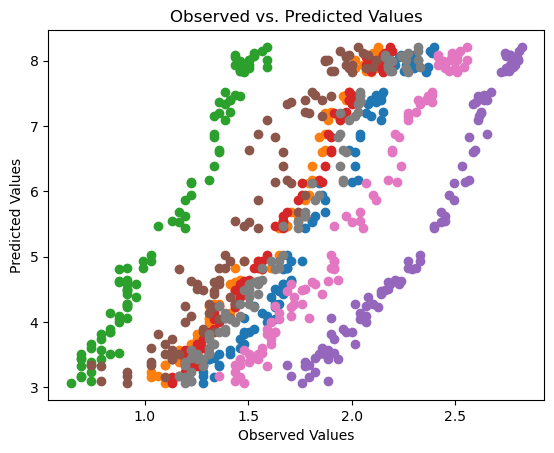

In [11]:
import matplotlib.pyplot as plt

# Create scatter plot

plt.scatter(x['High_School'], predicted)
plt.scatter(x['Associates_Degree'], predicted)
plt.scatter(x['Professional_Degree'], predicted)
plt.scatter(x['White'], predicted)
plt.scatter(x['Black'], predicted)
plt.scatter(x['Asian'], predicted)
plt.scatter(x['Hispanic'], predicted)
plt.scatter(x['Men'], predicted)


# Add title and axis labels
plt.title("Observed vs. Predicted Values")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")

# Show the plot
plt.show()

6. Create 2 unique visualizations of the results using matplotlib (e.g., time series predicted values and observations, plots with more than 2 variables represented such as 3D plane or changing size of dots, a plot comparing results of the logged and unlogged regression, etc…). For visualization ideas visit the matplotlib website.

In [ ]:
High_School = 

ValueError: Boolean array expected for the condition, not object

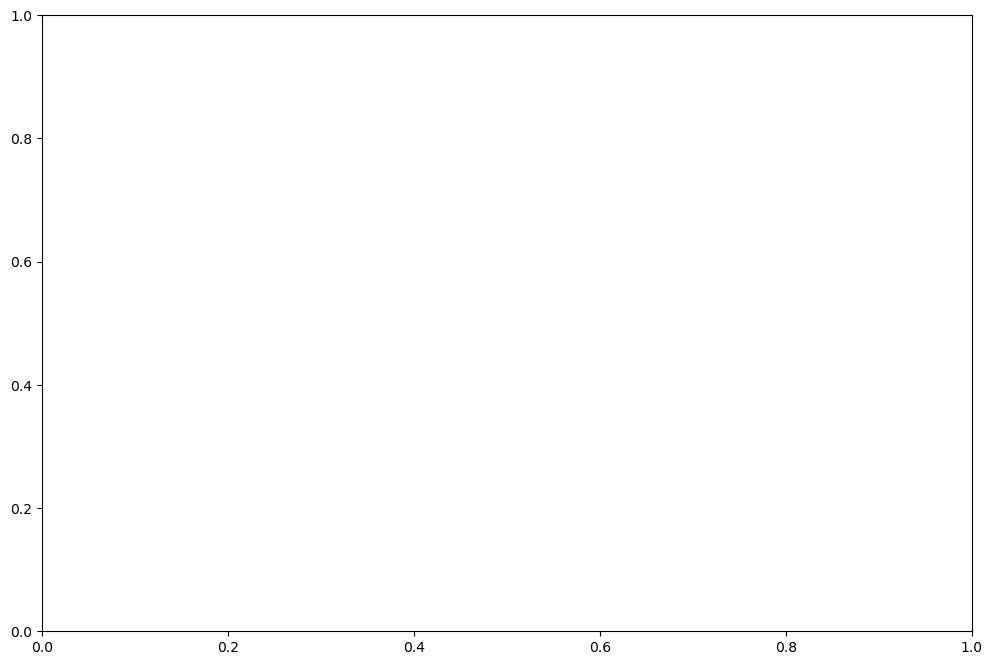

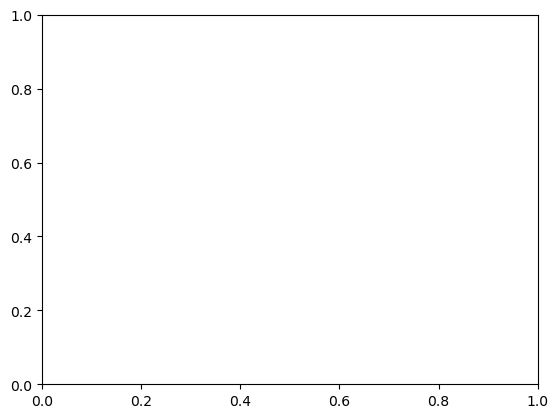

In [50]:
import numpy as np
import matplotlib.pyplot as plt

for x in x_vars:
    fig, ax = plt.subplots(figsize = (12, 8))
    data.plot.scatter(x= log_data,
                     y = y)